# Task 2: To Explore Supervised Machine Learning

### Importing libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split,GridSearchCV

#Importing Machine Learning Model
from catboost import CatBoostRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor


#statistical Tools
from sklearn import metrics

#To tranform data
from sklearn import preprocessing

### Reading and displaying data

In [2]:
#Reading the dataset from the remote link provided using pandas 
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

#Getting the data in Dataframe
data = pd.read_csv(data)

#printing the first 5 rows dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#displaying some basic statistical details of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Visualizing the relationship between the data

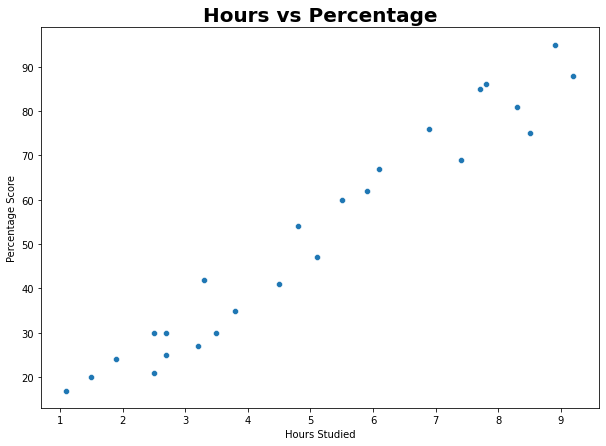

In [4]:
#a plot to check manually if a linear relation exists between 'Hours Studied' and 'Percentage Score'
fig = plt.figure(figsize=(10, 7))

ax = sns.scatterplot(x=data.Hours, y=data.Scores)
ax.set(xlabel='Hours Studied', ylabel='Percentage Score')

plt.title('Hours vs Percentage',fontweight ='bold', fontsize=20) 
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


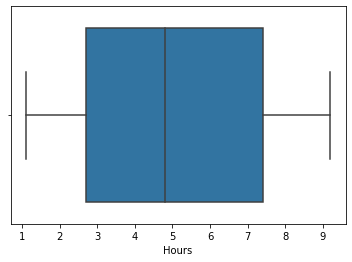

In [5]:
sns.boxplot(data.Hours)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


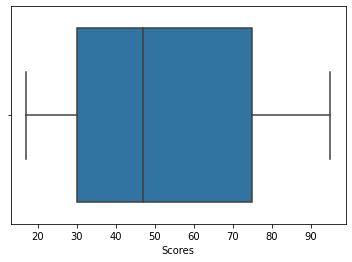

In [6]:
sns.boxplot(data.Scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


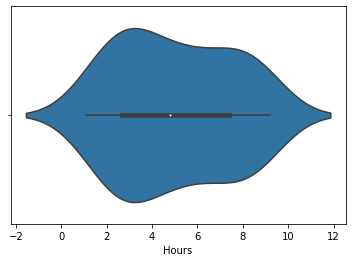

In [7]:
sns.violinplot(data.Hours)

### Preparing the data and Train-Test split 

In [8]:
x = data.Hours.values.reshape(-1,1)
y = data.Scores
x.shape, y.shape

((25, 1), (25,))

In [9]:
#splitting the dataset in 80-20 ratio into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the algorithm 

In [10]:
lr = LinearRegression()

ada = ensemble.AdaBoostRegressor(learning_rate=0.01)
xgb = XGBRFRegressor(n_jobs=-1, max_depth=5)
cat = CatBoostRegressor(verbose=0)

knn = KNeighborsRegressor()

svr = SVR(kernel='linear', C=10, gamma='scale')

# Defining the model

In [11]:
accuracy = {}
rmse = {}
explained_variance = {}
max_error = {}
MAE = {}

def train_model(model, model_name):
    print(model_name)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc = metrics.r2_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('R2_Score',acc)

    met = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE : ', met)
    rmse[model_name] = met

    var = (metrics.explained_variance_score(y_test, pred))
    print('Explained_Variance : ', var)
    explained_variance[model_name] = var

    error = (metrics.max_error(y_test, pred))
    print('Max_Error : ', error)
    max_error[model_name] = error
    
    err = metrics.mean_absolute_error(y_test, pred)
    print("Mean Absolute Error", err)
    MAE[model_name] = err

### Plotting the regression line 

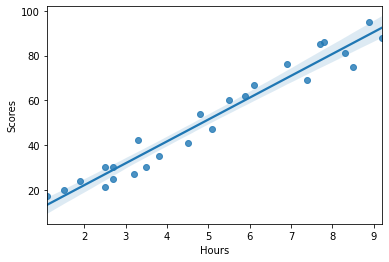

In [12]:
sns.regplot(x=data.Hours, y=data.Scores)

### Traning our Model

In [13]:
train_model(cat, "Cat Boost")

Cat Boost
R2_Score 73.0672601857742
RMSE :  10.330454406263467
Explained_Variance :  0.7851885541026279
Max_Error :  15.279561177174713
Mean Absolute Error 9.095335291810603


In [14]:
train_model(svr, "Support Vector Machine")

Support Vector Machine
R2_Score 90.60506455085482
RMSE :  6.101351671858693
Explained_Variance :  0.9308111595229798
Max_Error :  10.222589783578954
Mean Absolute Error 4.905162711322705


In [15]:
train_model(lr, "Linear Regression")

Linear Regression
R2_Score 94.54906892105353
RMSE :  4.647447612100373
Explained_Variance :  0.9482829156738145
Max_Error :  6.732260779489835
Mean Absolute Error 4.183859899002982


In [16]:
train_model(xgb, "Xtreme Gradient Random Forest")

Xtreme Gradient Random Forest
[17:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_Score 96.24079345507916
RMSE :  3.8594662861067137
Explained_Variance :  0.9634984952596719
Max_Error :  5.923337936401367
Mean Absolute Error 3.442781448364258


In [17]:
train_model(ada, "Ada Boost")

Ada Boost
R2_Score 85.09145691724433
RMSE :  7.685935929417515
Explained_Variance :  0.8902909572200911
Max_Error :  12.333333333333329
Mean Absolute Error 6.65


In [18]:
train_model(knn, "K Nearest Neighbors")

K Nearest Neighbors
R2_Score 90.95093882495458
RMSE :  5.987987975939829
Explained_Variance :  0.9407793256612155
Max_Error :  11.599999999999994
Mean Absolute Error 4.639999999999999


# Visualising our Output

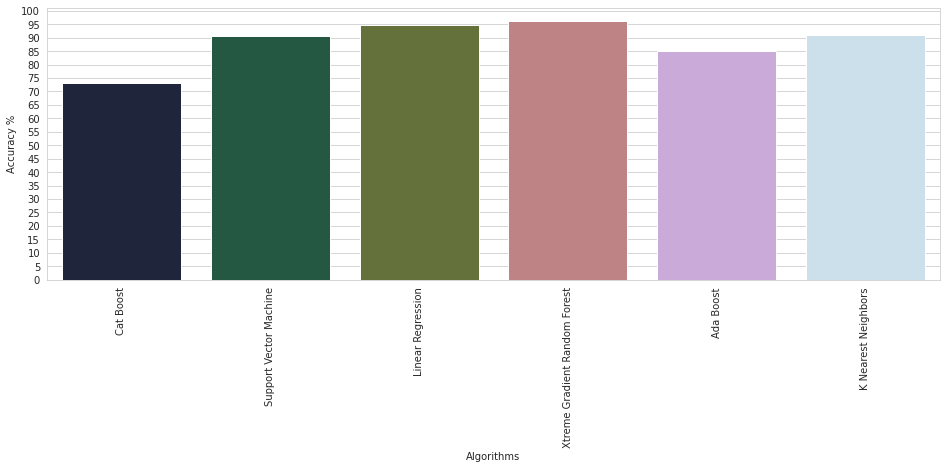

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

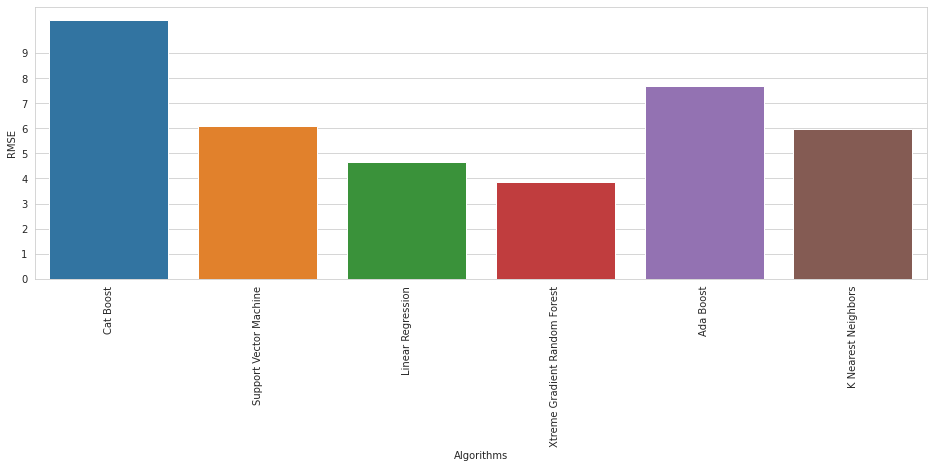

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,10,1))
plt.ylabel("RMSE")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(rmse.keys()), y=list(rmse.values()))
plt.show()

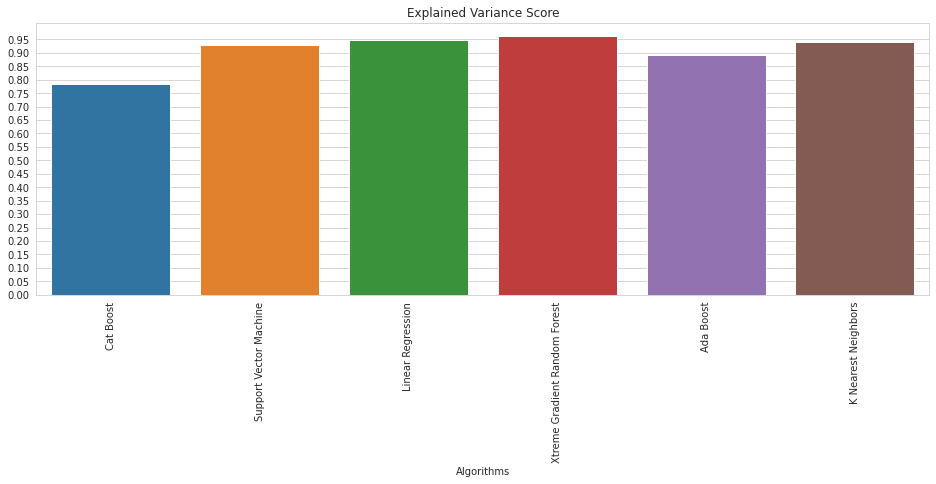

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.title("Explained Variance Score")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(explained_variance.keys()), y=list(explained_variance.values()))
plt.show()

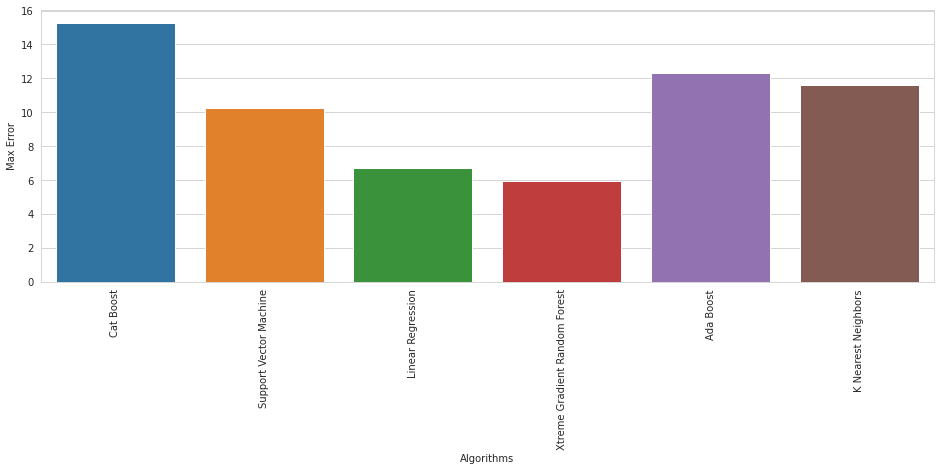

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,20,2))
plt.ylabel("Max Error")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(max_error.keys()), y=list(max_error.values()))
plt.show()

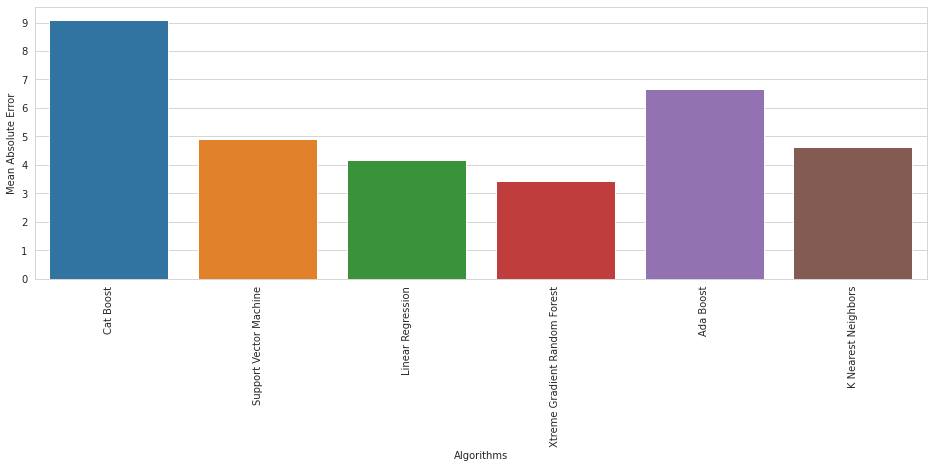

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 10, 1))
plt.ylabel("Mean Absolute Error")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x = list(MAE.keys()), y = list(MAE.values()))
plt.show()

## Seems like Xtreme Grading Boosting and Linear Regression is giving us more accuracy but as we only have 1 independent variable I will go with Linear Regression

### Testing the model with given data 

In [24]:
# Printing the predicted score if a student studies for 9.25 hrs in a day
hrs = 9.25
prediction = lr.predict([[hrs]])
print("No. of Hours : %5.2f" %(hrs))
print("Predicted Score : %5.2f" %(prediction[0]))

No. of Hours :  9.25
Predicted Score : 93.69
